In [163]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn

In [164]:
cl_path = "CL.csv"
cvx_path = "CVX.csv"
pep_path = "PEP.csv"
pg_path = "PG.csv"
xom_path = "XOM.csv"
sp500_path = "^GSPC.csv"

#Daily prices trial
# xom2_path = "XOM2.csv"
# cvx2_path = "CVX1.csv"
# pep2_path = "PEP2.csv"

In [165]:
#read and convert files into pd dataframe
#cl_df= pd.read_csv(cl_path, parse_dates =["Date"], index_col="Date")
cl_df= pd.read_csv(cl_path)
cvx_df= pd.read_csv(cvx_path)
pep_df= pd.read_csv(pep_path)
pg_df= pd.read_csv(pg_path)
xom_df= pd.read_csv(xom_path)
sp500_df = pd.read_csv(sp500_path)

In [166]:
# pep2_df= pd.read_csv(pep2_path)
# cvx2_df= pd.read_csv(cvx2_path)
# xom2_df= pd.read_csv(xom2_path)

In [167]:
#sp500_df.head()

In [168]:
#Change Adj Close column to the ticker symbol of the stock
cl_df = cl_df.rename(columns = {"Adj Close": "CL"})
cvx_df = cvx_df.rename(columns = {"Adj Close": "CVX"})
pep_df = pep_df.rename(columns = {"Adj Close": "PEP"})
pg_df = pg_df.rename(columns = {"Adj Close": "PG"})
xom_df =xom_df.rename(columns = {"Adj Close": "XOM"})
sp500_df =sp500_df.rename(columns = {"Adj Close": "SP500"})

In [169]:
# xom2_df =xom2_df.rename(columns = {"Adj Close": "CL"})
# cvx2_df = cvx2_df.rename(columns = {"Adj Close": "CVX"})
# pep2_df = pep2_df.rename(columns = {"Adj Close": "PEP"})


In [170]:
cvx_df.head()

,Date,Open,High,Low,Close,CVX,Volume
0,2010-01-01,78.199997,81.089996,71.750000,72.120003,48.390926,207150500
1,2010-02-01,72.699997,74.580002,69.550003,72.300003,48.511700,229392800
2,2010-03-01,72.629997,76.139999,72.389999,75.830002,51.367226,215133500
3,2010-04-01,76.400002,83.139999,76.339996,81.440002,55.167446,207104600
4,2010-05-01,81.959999,83.410004,70.800003,73.870003,50.039509,298278800


In [171]:
#filter to only column needed for the analysis
cvx_clean_df = cvx_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [172]:
# cvx_clean_df.head()

In [173]:
#filter all stocks to only column needed for the analysis
cl_clean_df = cl_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
pep_clean_df = pep_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
pg_clean_df = pg_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
xom_clean_df = xom_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
sp500_clean_df = sp500_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [174]:
# cv2_clean_df = cvx2_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
# pep2_clean_df = pep2_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
# xom2_clean_df = xom2_df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [175]:
# xom_clean_df.head()

In [176]:
#merge all the df 2 at a time
Tunde_merged_df1 = pd.merge(cvx_clean_df,xom_clean_df, on="Date")

In [177]:
Tunde_merged_df1.head()

,Date,CVX,XOM
0,2010-01-01,48.390926,45.100105
1,2010-02-01,48.511700,45.499088
2,2010-03-01,51.367226,47.190937
3,2010-04-01,55.167446,47.747517
4,2010-05-01,50.039509,42.597256


In [178]:
Tunde_merged_df2 = pd.merge(cl_clean_df,pg_clean_df, on="Date")

In [179]:
Tunde_merged_df3 = pd.merge(Tunde_merged_df1,Tunde_merged_df2, on="Date")

In [180]:
#Tunde_merged_df3.head()

In [181]:
Tunde_merged_df4 = pd.merge(Tunde_merged_df3,sp500_clean_df, on="Date")

In [182]:
Tunde_finalMerged_df = pd.merge(Tunde_merged_df4,pep_clean_df,on="Date")

In [183]:
Tunde_finalMerged_df.tail()

,Date,CVX,XOM,CL,PG,SP500,PEP
115,2019-08-01,112.402039,64.633873,72.796333,117.974602,2926.459961,132.911026
116,2019-09-01,114.406403,67.472893,72.168015,122.046753,2976.739990,133.270691
117,2019-10-01,112.033386,64.567955,67.347649,122.174316,3037.560059,134.260178
118,2019-11-01,112.988373,65.103073,67.003723,120.535347,3140.979980,132.948608
119,2019-12-01,117.394318,67.483917,68.011444,123.339874,3230.780029,133.770782


In [184]:
#check the length of rows to ensure its 120 months
len(Tunde_finalMerged_df)

120

In [185]:
Tunde_finalMerged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    120 non-null    object 
 1   CVX     120 non-null    float64
 2   XOM     120 non-null    float64
 3   CL      120 non-null    float64
 4   PG      120 non-null    float64
 5   SP500   120 non-null    float64
 6   PEP     120 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.5+ KB


In [26]:
#Calculate the monthly returns and save to a series, this is the percentage change of current price and previous price
cvx_returns = round(Tunde_finalMerged_df["CVX"].pct_change(),2)
xom_returns = round(Tunde_finalMerged_df["XOM"].pct_change(),2)
cl_returns = round(Tunde_finalMerged_df["CL"].pct_change(),2)
pg_returns = round(Tunde_finalMerged_df["PG"].pct_change(),2)
pep_returns = round(Tunde_finalMerged_df["PEP"].pct_change(),2)
sp500_returns = round(Tunde_finalMerged_df["SP500"].pct_change(),2)

In [27]:
#check to confirm returns confirm accuracy ln(P1/P0)...row 1 should be null
cvx_returns

0       NaN
1      0.00
2      0.06
3      0.07
4     -0.09
       ... 
115   -0.04
116    0.02
117   -0.02
118    0.01
119    0.04
Name: CVX, Length: 120, dtype: float64

In [32]:
#Define date column for inclusion in returns df
dates = Tunde_finalMerged_df["Date"]

In [33]:
#pass the returns into a df
returns_df = pd.DataFrame({"Date":dates,"CVX":cvx_returns,"XOM":xom_returns,"CL":cl_returns,
                          "PG":pg_returns,"PEP":pep_returns, "SP500":sp500_returns})

In [34]:
returns_df.head()

,Date,CVX,XOM,CL,PG,PEP,SP500
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,0.00,0.01,0.05,0.04,0.05,0.03
2,2010-03-01,0.06,0.04,0.03,-0.00,0.06,0.06
3,2010-04-01,0.07,0.01,-0.01,-0.02,-0.01,0.01
4,2010-05-01,-0.09,-0.11,-0.06,-0.01,-0.04,-0.08


In [35]:
#remove rows with null values, should be only the first row
returns_df = returns_df.dropna()

In [36]:
returns_df

,Date,CVX,XOM,CL,PG,PEP,SP500
1,2010-02-01,0.00,0.01,0.05,0.04,0.05,0.03
2,2010-03-01,0.06,0.04,0.03,-0.00,0.06,0.06
3,2010-04-01,0.07,0.01,-0.01,-0.02,-0.01,0.01
4,2010-05-01,-0.09,-0.11,-0.06,-0.01,-0.04,-0.08
5,2010-06-01,-0.07,-0.05,0.01,-0.02,-0.03,-0.05
...,...,...,...,...,...,...,...
115,2019-08-01,-0.04,-0.08,0.04,0.03,0.07,-0.02
116,2019-09-01,0.02,0.04,-0.01,0.03,0.00,0.02
117,2019-10-01,-0.02,-0.04,-0.07,0.00,0.01,0.02
118,2019-11-01,0.01,0.01,-0.01,-0.01,-0.01,0.03


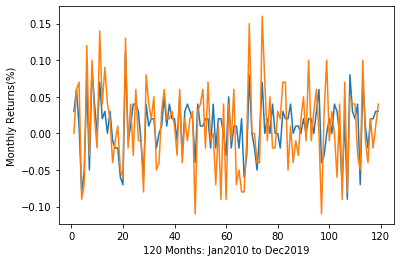

In [49]:
#plot returns for a single stock and sp500
#legend? 
returns_df["SP500"].plot()
returns_df["CVX"].plot()
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.savefig("Images/SingleStockMonthReturns.png")

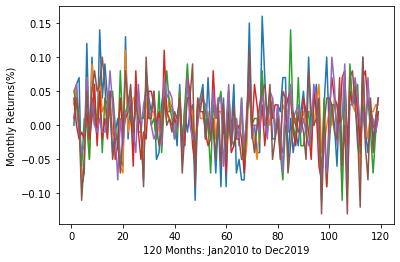

In [50]:
#Plot line plot of all returns to show monthly volatility and how they all swing on average between +-10% monthly 
returns_df["CVX"].plot()
returns_df["SP500"].plot()
returns_df["CL"].plot()
returns_df["PG"].plot()
returns_df["PEP"].plot()
returns_df["XOM"].plot()
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.savefig("Images/MonthReturns.png")

In [54]:
#Calculate the cummulative returns of the stocks over the 10 years period
cvxcumret = (cvx_returns +1).cumprod()
pepcumret = (pep_returns + 1).cumprod()
xomcumret = (xom_returns +1 ).cumprod()
clcumret = (cl_returns +1 ).cumprod()
pgcumret = (pg_returns +1 ).cumprod()
sp500cumret =(sp500_returns +1 ).cumprod()

In [55]:
round(sp500cumret,2)

0       NaN
1      1.03
2      1.09
3      1.10
4      1.01
       ... 
115    2.66
116    2.72
117    2.77
118    2.85
119    2.94
Name: SP500, Length: 120, dtype: float64

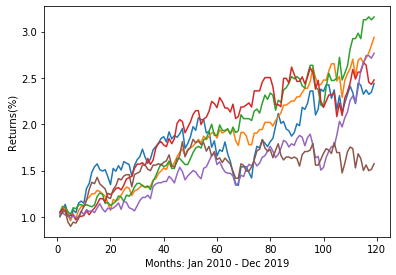

In [150]:
#line plot of the cummulative returns of the stocks 
fig=plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cvxcumret)
ax1.plot(sp500cumret)
ax1.plot(pepcumret)
ax1.plot(clcumret)
ax1.plot(pgcumret)
ax1.plot(xomcumret)
plt.xlabel("Months: Jan 2010 - Dec 2019")
plt.ylabel("Returns(%)")
plt.savefig("Images/Cummulative.png")

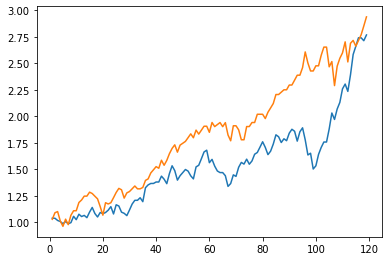

In [62]:
fig=plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(pgcumret)
ax1.plot(sp500cumret)

Text(0, 0.5, 'Monthly Returns(%)')

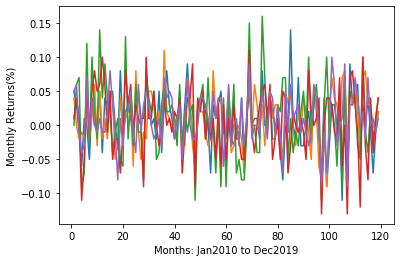

In [63]:
#sample line with CVX and XOM
returns_df["CL"].plot()
returns_df["PG"].plot()
returns_df["CVX"].plot()
returns_df["XOM"].plot()
returns_df["PEP"].plot()


plt.xlabel("Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")

In [108]:
#BarChart = returns_df[["CVX","XOM","CL","PG","PEP"]]

In [110]:
#Bar = BarChart.plot(kind="bar",figsize=(10,5), title="Retunrs 5 stocks",
#                                        color="green", fontsize=12 )

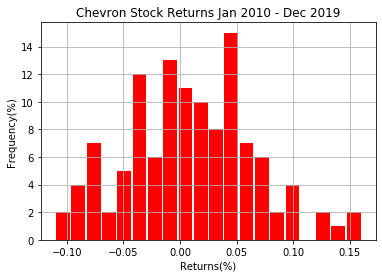

In [140]:
#Show the fluctuation in returns for one asset
#returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=0.9, color="green")
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
plt.title("Chevron Stock Returns Jan 2010 - Dec 2019")
plt.ylabel("Frequency(%)")
plt.xlabel("Returns(%)")
plt.savefig("Images/CVXReturns.png")

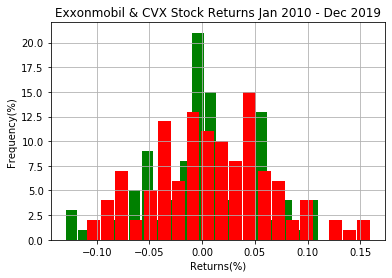

In [162]:
returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=0.9, color="green")
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
plt.title("Exxonmobil & CVX Stock Returns Jan 2010 - Dec 2019")
plt.xlabel("Returns(%)")
plt.ylabel("Frequency(%)")
plt.savefig("Images/XOMReturns.png")

In [66]:
#standard deviations of returns
cvxstd = round(returns_df["CVX"].std(),3)
xomstd = round(returns_df["XOM"].std(),3)
pgstd = round(returns_df["PG"].std(),3)
clstd = round(returns_df["CL"].std(),3)
pepstd = round(returns_df["PEP"].std(),3)
sp500std = round(returns_df["SP500"].std(),3)

In [67]:
#standard deviation of prices 
cvxstdP = round(cvx_clean_df["CVX"].std(),3)
xomstdP= round(xom_clean_df["XOM"].std(),3)
pgstdP = round(pg_clean_df["PG"].std(),3)
clstdP= round(cl_clean_df["CL"].std(),3)
pepstdP = round(pep_clean_df["PEP"].std(),3)
sp500stdP = round(sp500_clean_df["SP500"].std(),3)

In [68]:
stddevR = pd.DataFrame({"CVX":cvxstd,"XOM":xomstd,"PG":pgstd,"CL":clstd,"PEP":pepstd, "SP500":sp500std}, index=[0])
#Error without index "If using all scalar values, you must pass an index"
stddevR

,CVX,XOM,PG,CL,PEP,SP500
0,0.056,0.049,0.039,0.041,0.038,0.036


In [70]:
#pass on std of returns into series for bar chart
#data_stdR = {"CVX": cvxstd,"XOM": xomstd,"PG": pgstd,"CL":clstd,"PEP":pepstd,"SP500":sp500std}
data_stdR = {"CVX": cvxstd,"XOM": xomstd,"PG": pgstd,"CL":clstd,"PEP":pepstd}
Ret_Std = pd.Series(data_stdR)
Ret_Std

CVX    0.056
XOM    0.049
PG     0.039
CL     0.041
PEP    0.038
dtype: float64

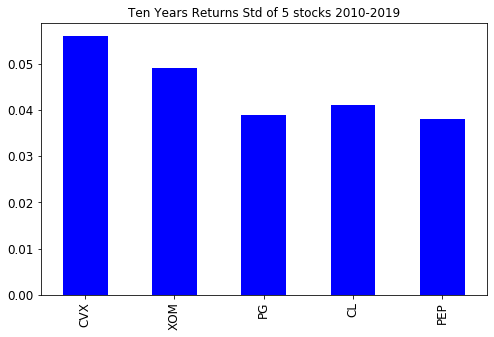

In [151]:
RetStd_Bar = Ret_Std.plot(kind="bar",figsize=(8,5), title="Ten Years Returns Std of 5 stocks 2010-2019",
                                       color="b", fontsize=12 )
plt.savefig("Images/Retstd.png")

In [73]:
#std of prices 
stddevP = pd.DataFrame({"CVX":cvxstdP,"XOM":xomstdP,"PG":pgstdP,"CL":clstdP,"PEP":pepstdP,"SP500":sp500stdP}, index=[0])
#Error without index "If using all scalar values, you must pass an index"
stddevP

,CVX,XOM,PG,CL,PEP,SP500
0,18.088,8.956,18.832,13.781,25.429,593.974


In [74]:
#make a series for std of prices 
#data_stdP = {"CVX": cvxstdP,"XOM": xomstdP,"PG": pgstdP,"CL":clstdP,"PEP":pepstdP,"SP500":sp500stdP}
data_stdP = {"CVX": cvxstdP,"XOM": xomstdP,"PG": pgstdP,"CL":clstdP,"PEP":pepstdP}
Price_Std = pd.Series(data_stdP)
Price_Std

CVX    18.088
XOM     8.956
PG     18.832
CL     13.781
PEP    25.429
dtype: float64

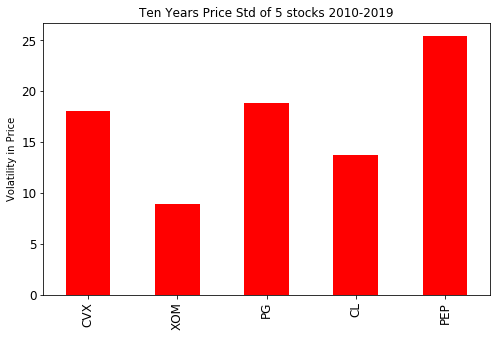

In [152]:
PriceStd_Bar = Price_Std.plot(kind="bar",figsize=(8,5), title="Ten Years Price Std of 5 stocks 2010-2019",
                                       color="red", fontsize=12 )
plt.ylabel("Volatility in Price")
plt.savefig("Images/Pricestd.png")

In [78]:
#Correlation Matrix ...a measure linear relationship between 2 variable..the effect of a change in one 
#variable on the other variable 
CorrelationMat = returns_df[["CVX","XOM","PG","CL","PEP", "SP500"]].corr()
CorrelationMat

,CVX,XOM,PG,CL,PEP,SP500
CVX,1.000000,0.771913,0.264548,0.319163,0.302752,0.686653
XOM,0.771913,1.000000,0.247652,0.298218,0.287862,0.677061
PG,0.264548,0.247652,1.000000,0.554765,0.551315,0.344167
CL,0.319163,0.298218,0.554765,1.000000,0.669013,0.480125
PEP,0.302752,0.287862,0.551315,0.669013,1.000000,0.456676
SP500,0.686653,0.677061,0.344167,0.480125,0.456676,1.000000


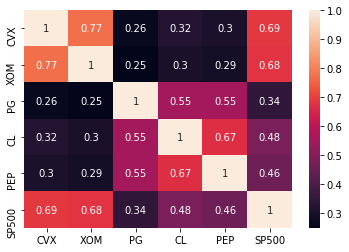

In [106]:
#Corelation matrix visual 
sn.heatmap(CorrelationMat, annot=True)
plt.savefig("Images/CorrMatrix.png")
plt.show()

In [84]:
#Covariance Matrix
Covariance = returns_df[["CVX","XOM","PG","CL","PEP", "SP500"]].cov()
Covariance

,CVX,XOM,PG,CL,PEP,SP500
CVX,0.003166,0.002148,0.000575,0.000736,0.000644,0.001399
XOM,0.002148,0.002446,0.000473,0.000604,0.000539,0.001212
PG,0.000575,0.000473,0.001491,0.000878,0.000805,0.000481
CL,0.000736,0.000604,0.000878,0.001679,0.001037,0.000712
PEP,0.000644,0.000539,0.000805,0.001037,0.001431,0.000626
SP500,0.001399,0.001212,0.000481,0.000712,0.000626,0.001311


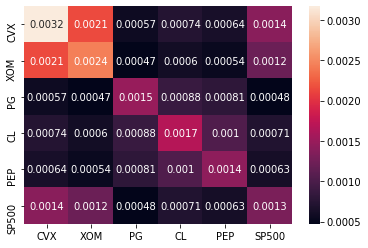

<Figure size 432x288 with 0 Axes>

In [85]:
#Covariance matrix visual 
sn.heatmap(Covariance, annot=True)
plt.show()
plt.savefig("Images/Covariance.png")

In [88]:
#Perform regression analysis to predict the stocks of 2 stocks with lowest correlation 

In [89]:
cvx_clean_df.head()

,Date,CVX
0,2010-01-01,48.390926
1,2010-02-01,48.511700
2,2010-03-01,51.367226
3,2010-04-01,55.167446
4,2010-05-01,50.039509


In [90]:
cvx_reg_df = (cvx_clean_df.drop(["Date"], axis=1)).reset_index()

In [91]:
# regression1_df = regression_df.rename(columns={"Index","Months"}, inplace=True)
len(cvx_reg_df)

120

The r-squared is: 0.7211201233688641


<function matplotlib.pyplot.show(*args, **kw)>

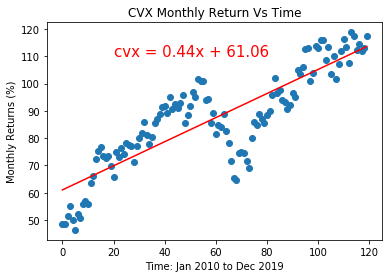

In [96]:
#CVX Regression 
#Define x and y variables for scatter plot
x_values = cvx_reg_df["index"]
y_values = cvx_reg_df["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns (%)")
plt.title("CVX Monthly Return Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVX_ScatterPlot.png")
plt.show

In [97]:
CVX_Jan2020 = (0.44*121) + 61.06
CVX_Feb2020 = (0.44*122) + 61.06
print(f"The forcasted monthly closing price of CVX in Jan 2020 is {CVX_Jan2020}")
print(f"The forcasted monthly closing price of CVX in Feb 2020 is {CVX_Feb2020}")

The forcasted monthly closing price of CVX in Jan 2020 is 114.30000000000001
The forcasted monthly closing price of CVX in Feb 2020 is 114.74000000000001


In [98]:
#the actual closing price of CVX in Jan is 104.37
#the actual closing price of CVX in Feb is  90.93...the std of cvx price is +/-18.1

In [99]:
pg_reg_df = (pg_clean_df.drop(["Date"], axis=1)).reset_index()

In [100]:
pg_reg_df.head()

,index,PG
0,0,44.368778
1,1,45.943375
2,2,45.936111
3,3,45.130230
4,4,44.694584


The r-squared is: 0.8344911100716593


<function matplotlib.pyplot.show(*args, **kw)>

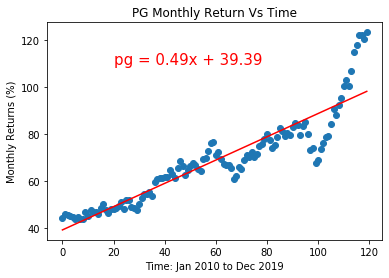

In [153]:
#PEP Regression 
#Define x and y variables for scatter plot
x_values = pg_reg_df["index"]
y_values = pg_reg_df["PG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "pg = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns (%)")
plt.title("PG Monthly Return Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/PG_ScatterPlot.png")
plt.show

In [161]:
PG_Jan2020 = (0.49*121) + 39.39
PG_Feb2020 = (0.49*122) + 39.39
print(f"The forcasted monthly closing price of PG in Jan 2020 is {PG_Jan2020}")
print(f"The forcasted monthly closing price of PG in Feb 2020 is {PG_Feb2020}")

The forcasted monthly closing price of PG in Jan 2020 is 98.68
The forcasted monthly closing price of PG in Feb 2020 is 99.17


In [ ]:
#the actual closing price of PG in Jan is 123.06
#the actual closing price of PG in Feb is  112.48...
#forecasted price for Jan is outside of std 18.83, while Feb is within

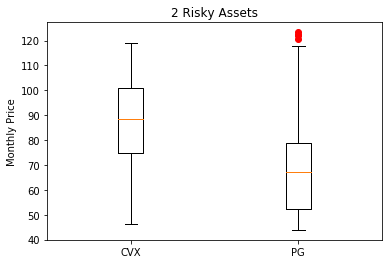

In [160]:
#Are there outliers in the data of the 2 assets due to news especially quaterly reports and dividend payout?
BoxPlot_Data = []
BoxPlot_Data.append(Tunde_finalMerged_df["CVX"])
# BoxPlot_Data.append(Tunde_finalMerged_df["XOM"])
BoxPlot_Data.append(Tunde_finalMerged_df["PG"])
# BoxPlot_Data.append(Tunde_finalMerged_df["CL"])
# BoxPlot_Data.append(Tunde_finalMerged_df["PEP"])
# BoxPlot_Data.append(Tunde_finalMerged_df["SP500"])
Risky_Assets =["CVX","PG"]
fig1, ax1=plt.subplots()
ax1.set_title("2 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2], Risky_Assets)
plt.savefig("Images/Boxplots.pdf")
plt.show()